In [28]:
from pathlib import Path

import numpy as np
from PIL import Image
from anomalib import TaskType
from anomalib.data.image.btech import BTech, BTechDataset
from torchvision.transforms.v2 import Resize
from torchvision.transforms.v2.functional import to_pil_image

In [29]:
dataset_root = Path.cwd() / "data" / "BTech"

In [30]:
btech_datamodule = BTech(
    root=dataset_root,
    category="01",
    image_size=(256, 256),
    train_batch_size=32,
    eval_batch_size=32,
    num_workers=0,
    task=TaskType.SEGMENTATION,
)

In [31]:
btech_datamodule.prepare_data()
btech_datamodule.setup()

In [32]:
i, data = next(enumerate(btech_datamodule.train_dataloader()))
print(data.keys(), data["image"].shape)

dict_keys(['image_path', 'label', 'image', 'mask']) torch.Size([32, 3, 256, 256])


In [33]:
i, data = next(enumerate(btech_datamodule.test_dataloader()))
print(data.keys(), data["image"].shape, data["mask"].shape)

dict_keys(['image_path', 'label', 'image', 'mask']) torch.Size([32, 3, 256, 256]) torch.Size([32, 256, 256])


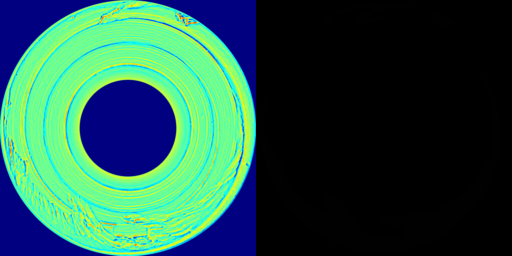

In [34]:
img = to_pil_image(data["image"][0].clone())
msk = to_pil_image(data["mask"][0]).convert("RGB")

Image.fromarray(np.hstack((np.array(img), np.array(msk))))

In [35]:
image_size = (256, 256)
transform = Resize(image_size, antialias=True)

In [36]:
btech_dataset_classification_train = BTechDataset(
    root=dataset_root,
    category="01",
    transform=transform,
    split="train",
    task=TaskType.CLASSIFICATION,
)
btech_dataset_classification_train.samples.head()

,path,split,label,image_path,mask_path,label_index
0,/Users/spoton/Studia/anomalie/beantech-anomaly...,train,ok,/Users/spoton/Studia/anomalie/beantech-anomaly...,/Users/spoton/Studia/anomalie/beantech-anomaly...,0
1,/Users/spoton/Studia/anomalie/beantech-anomaly...,train,ok,/Users/spoton/Studia/anomalie/beantech-anomaly...,/Users/spoton/Studia/anomalie/beantech-anomaly...,0
2,/Users/spoton/Studia/anomalie/beantech-anomaly...,train,ok,/Users/spoton/Studia/anomalie/beantech-anomaly...,/Users/spoton/Studia/anomalie/beantech-anomaly...,0
3,/Users/spoton/Studia/anomalie/beantech-anomaly...,train,ok,/Users/spoton/Studia/anomalie/beantech-anomaly...,/Users/spoton/Studia/anomalie/beantech-anomaly...,0
4,/Users/spoton/Studia/anomalie/beantech-anomaly...,train,ok,/Users/spoton/Studia/anomalie/beantech-anomaly...,/Users/spoton/Studia/anomalie/beantech-anomaly...,0


In [37]:
sample = btech_dataset_classification_train[0]
print(sample.keys(), sample["image"].shape)

dict_keys(['image_path', 'label', 'image']) torch.Size([3, 256, 256])


In [38]:
btech_dataset_classification_test = BTechDataset(
    root=dataset_root,
    category="01",
    transform=transform,
    split="test",
    task=TaskType.CLASSIFICATION,
)
sample = btech_dataset_classification_test[0]
print(sample.keys(), sample["image"].shape, sample["image_path"], sample["label"])

dict_keys(['image_path', 'label', 'image']) torch.Size([3, 256, 256]) /Users/spoton/Studia/anomalie/beantech-anomaly-detector/src/data/BTech/01/test/ko/0000.png 1


In [39]:
btech_dataset_segmentation_train = BTechDataset(
    root=dataset_root,
    category="01",
    transform=transform,
    split="train",
    task=TaskType.SEGMENTATION,
)
btech_dataset_segmentation_train.samples.head()

,path,split,label,image_path,mask_path,label_index
0,/Users/spoton/Studia/anomalie/beantech-anomaly...,train,ok,/Users/spoton/Studia/anomalie/beantech-anomaly...,/Users/spoton/Studia/anomalie/beantech-anomaly...,0
1,/Users/spoton/Studia/anomalie/beantech-anomaly...,train,ok,/Users/spoton/Studia/anomalie/beantech-anomaly...,/Users/spoton/Studia/anomalie/beantech-anomaly...,0
2,/Users/spoton/Studia/anomalie/beantech-anomaly...,train,ok,/Users/spoton/Studia/anomalie/beantech-anomaly...,/Users/spoton/Studia/anomalie/beantech-anomaly...,0
3,/Users/spoton/Studia/anomalie/beantech-anomaly...,train,ok,/Users/spoton/Studia/anomalie/beantech-anomaly...,/Users/spoton/Studia/anomalie/beantech-anomaly...,0
4,/Users/spoton/Studia/anomalie/beantech-anomaly...,train,ok,/Users/spoton/Studia/anomalie/beantech-anomaly...,/Users/spoton/Studia/anomalie/beantech-anomaly...,0


In [40]:
img = to_pil_image(sample["image"].clone())
msk = to_pil_image(sample["mask"]).convert("RGB")

Image.fromarray(np.hstack((np.array(img), np.array(msk))))

KeyError: 'mask'